## **Clusterização**

`mall_customers.csv`: **dicionário de dados**

|          Feature |                    Description |
|-----------------:|-------------------------------:|
|      id          | customer id                    |
|      age         | customer age                   |
|      income      | customer's annual income       |
|     score        | buying potential               |


In [34]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/fixacao/mall_customers.csv' -O 'mall_customers.csv'

## Estilização do layout dos gráficos (plotly)

In [35]:
%%writefile custom_layout.py
import plotly.express as px

# Define a custom layout dictionary
custom_layout = {
    'width': 700,
    'height': 400,
    'paper_bgcolor': 'white',
    'plot_bgcolor': 'white',
    'font': {'family': 'Palatino', 'size': 12},
    'xaxis_showgrid': False,
    'yaxis_showgrid': False,
    'xaxis_linecolor': 'lightgray',
    'yaxis_linecolor': 'lightgray',
    'xaxis_zeroline': False,
    'xaxis': {'showline': True}
}

# Set the default template:
px.defaults.template = 'simple_white'

# Defining a color palette:
color_discrete_sequence = ['#bdbf09', '#2292a4', 'lightgray', '#CE4760', '#d96c06']

# Create a custom marker style dictionary
custom_marker_style = {
    'size': 10,            # Adjust the size as needed
    'line_width': 1,
    'opacity': 0.7         # Adjust the opacity as needed
}

Overwriting custom_layout.py


## Funções

In [36]:
def copy_dataframe(dataframe):
    #Creates a copy of the input dataframe (backup)

    copied_df = dataframe.copy()
    return copied_df
# --------------------------------------------------------------------- Normalização:
def scale_features(dataframe, selected_columns):
    """
    Normalizes the selected numercial columns of  a dataframe
    """
    features = dataframe[selected_columns]
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    scaled_df = pd.DataFrame(scaled_features, columns=selected_columns)

    return scaled_df
# ----------------------------------------------------------------------- Codificação:
def label_encode_features(dataframe, selected_columns):
    """
    Encodes the selected categorical columns of a dataframe
    """
    encoded_df = dataframe.copy()

    # Initialize the LabelEncoder
    label_encoder = LabelEncoder()

    # Apply the LabelEncoder to the selected columns
    for column in selected_columns:
        if column in encoded_df.columns:
            encoded_df[column] = label_encoder.fit_transform(encoded_df[column])

    return encoded_df
# --------------------------------------------------------------------------------- Escolha do k:
def elbow_silhouette_subplots(dataframe, max_clusters, template='simple_white'):
    """
    Generate elbow and silhouette score subplots for different numbers of clusters.
    Args:
      - dataframe (pd.DataFrame): The DataFrame containing the features.
      - max_clusters (int): The maximum number of clusters to consider.
      - template (str): Plotly template for the plots (default is 'simple_white').
    Returns:
      - None (displays the subplots).
    """
    # Suppress FutureWarnings
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Create empty lists to store inertia (within-cluster sum of squares) and silhouette scores
    inertias = []
    silhouette_scores = []

    # Iterate through different numbers of clusters and fit K-Means
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=35)
        cluster_labels = kmeans.fit_predict(dataframe)

        # Calculate the inertia and silhouette score
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(dataframe, cluster_labels))

    # Convert the range to a list
    num_clusters = list(range(2, max_clusters + 1))

    # Create subplots with two columns
    fig = make_subplots(rows=1, cols=2, subplot_titles=['Elbow Method', 'Silhouette Score'])

    # Add the elbow plot to the first subplot
    fig.add_trace(go.Scatter(x=num_clusters, y=inertias, mode='lines+markers', name='Inertia'), row=1, col=1)
    fig.update_xaxes(title_text='Number of Clusters', row=1, col=1)
    fig.update_yaxes(title_text='Inertia', row=1, col=1)

    # Add the silhouette score plot to the second subplot
    fig.add_trace(go.Scatter(x=num_clusters, y=silhouette_scores, mode='lines+markers', name='Silhouette Score'), row=1, col=2)
    fig.update_xaxes(title_text='Number of Clusters', row=1, col=2)
    fig.update_yaxes(title_text='Silhouette Score', row=1, col=2)

    # Update the layout
    fig.update_layout(title='Elbow Method and Silhouette Score', template=template)
    fig.show()
# --------------------------------------------------------------------------------- K-means:
def apply_kmeans(dataframe, k):
    """
    Apply K-Means clustering to the input dataframe.
    Args:
      - dataframe (pd.DataFrame): The DataFrame containing the features.
      - k (int): The number of clusters to create.
    Returns:
      - labels (pd.Series): A Series containing cluster labels for each row.
    """
    kmeans = KMeans(n_clusters=k, random_state=35)
    labels = kmeans.fit_predict(dataframe)

    return labels

## Bibliotecas

In [37]:
# -- Manipulação de dados:
import numpy as np
import pandas as pd

# -- Desligar warnings:
import warnings

# -- Visualização de dados:
import plotly.express as px                              # core library
import plotly.graph_objs as go                           # core library
from plotly.subplots import make_subplots                # core library
import matplotlib.pyplot as plt                          # auxiliar
import seaborn as sns                                    # auxiliar
from custom_layout import *

# -- Modelagem:
from sklearn.preprocessing import StandardScaler         # normalização
from sklearn.preprocessing import LabelEncoder           # codificação dados categóricos
from sklearn.cluster import KMeans                       # agrupamento
from sklearn.metrics import silhouette_score             # validação

## Coleta de dados

In [38]:
clientes = pd.read_csv('mall_customers.csv')
clientes.head()

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Análise Exploratória de Dados

In [39]:
clientes.shape

(200, 5)

In [40]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      200 non-null    int64 
 1   gender  200 non-null    object
 2   age     200 non-null    int64 
 3   income  200 non-null    int64 
 4   score   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [41]:
clientes.isna().sum()

id        0
gender    0
age       0
income    0
score     0
dtype: int64

In [42]:
clientes['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [43]:
clientes['gender'] = clientes['gender'].replace('Female', 0).replace('Male', 1)
clientes.tail()

,id,gender,age,income,score
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18
199,200,1,30,137,83


In [44]:
clientes.drop('id', axis=1, inplace=True)
clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,200.0,0.44,0.497633,0.0,0.00,0.0,1.0,1.0
age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


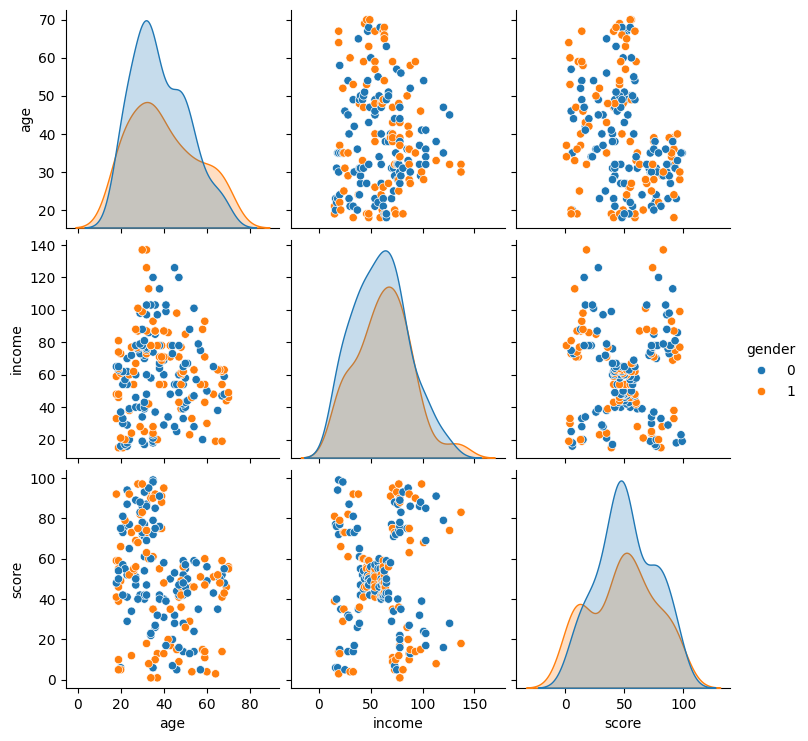

In [45]:
sns.pairplot(clientes, hue='gender')

In [46]:
fig = px.box(
    clientes,
    y='age'
)
fig.update_layout(width=400, height=600)
fig.show()

In [47]:
fig = px.box(
    clientes,
    y='income'
)
fig.update_layout(width=400, height=600)
fig.show()

In [48]:
clientes = clientes.query('income < 130')
clientes.shape

(198, 4)

In [49]:
fig = px.box(
    clientes,
    y='score'
)
fig.update_layout(width=400, height=600)
fig.show()

## Modelagem

In [50]:
features = clientes.copy()

In [51]:
# normalizar:
scaler = StandardScaler()

colunas_normalizar = ['age', 'income', 'score']
scaled_features = scale_features(clientes, selected_columns=colunas_normalizar)
features[colunas_normalizar] = scaled_features
features.head(2)

,gender,age,income,score
0,1,-1.425414,-1.779171,-0.435989
1,1,-1.282367,-1.779171,1.199413


In [52]:
# Treinamento do modelo
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)

# Predições
labels = kmeans.predict(features)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3,
       1, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       2, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 4, 3, 3, 3, 2, 2, 2, 2, 3, 4, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 2, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0],
      dtype=int32)

In [53]:
clientes['cluster'] =labels.astype(str)
clientes.head()

<ipython-input-53-2bd3c3d679e3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gender,age,income,score,cluster
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,1
3,0,23,16,77,3
4,0,31,17,40,3


## Validação

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

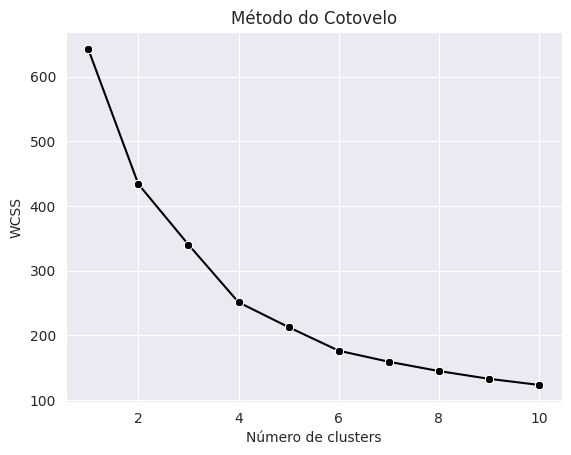

In [54]:
# lista vazia
WCSS = []

# loop de iteração (teste com n clusters)
for k in range(1, 11):
  modelo_clustering = KMeans(n_clusters=k, random_state = 42)
  modelo_clustering = modelo_clustering.fit(features)   # retorna os clusters
  WCSS.append(modelo_clustering.inertia_)             # armazena o WCSS na lista vazia

# visualização
with sns.axes_style('darkgrid'):
  grafico_ellbow = sns.lineplot(x=range(1, 11), y=WCSS, marker="8", color='k');
  grafico_ellbow.set(title='Método do Cotovelo', ylabel='WCSS', xlabel='Número de clusters');

## Exploração dos clusters(grupamentos)

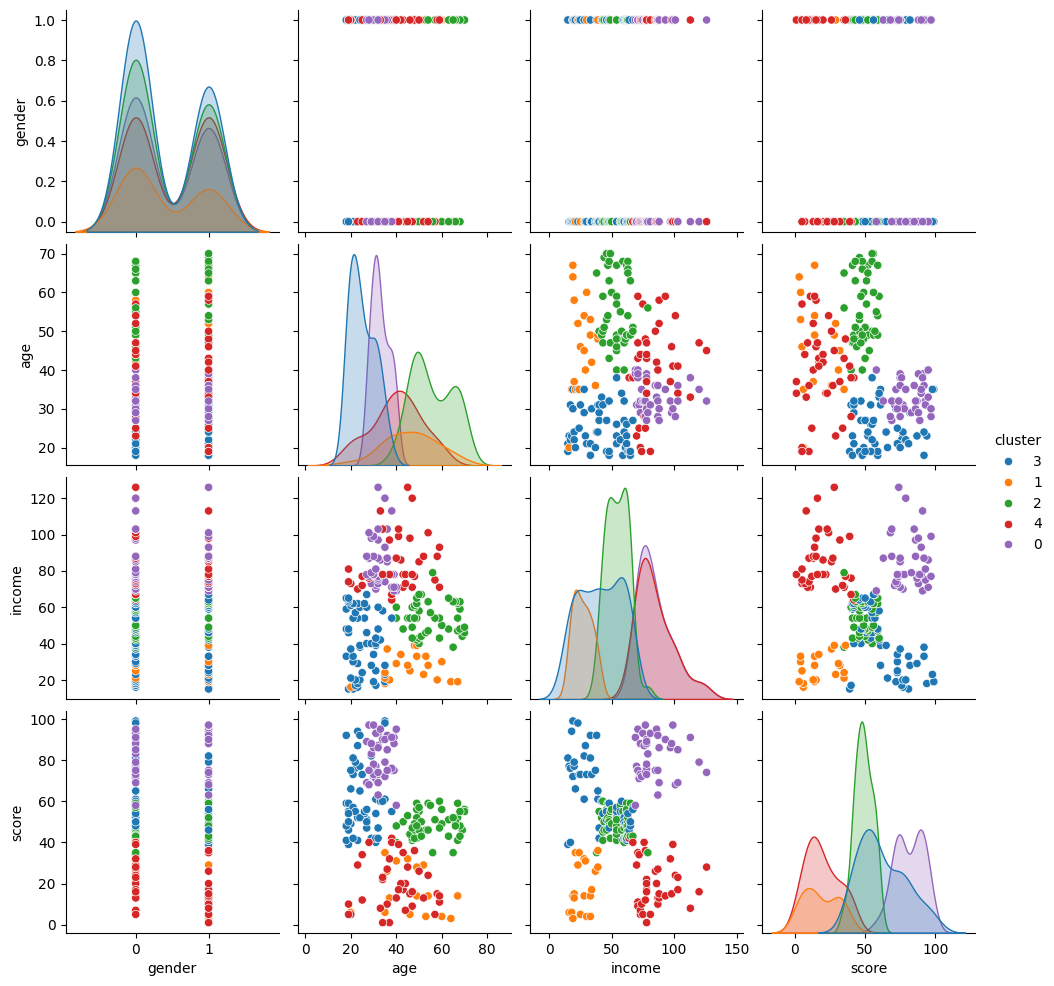

In [55]:
sns.pairplot(
    data=clientes,
    hue = 'cluster'
)

In [56]:
fig = px.scatter(
    clientes,
    x='income',
    y='score',
    color='cluster'
)

fig.update_traces(marker=custom_marker_style)
fig.update_layout(custom_layout)

fig.show()

In [57]:
fig = px.scatter(
    clientes,
    x='income',
    y='age',
    color='cluster'
)

fig.update_traces(marker=custom_marker_style)
fig.update_layout(custom_layout)

fig.show()

In [58]:
fig = px.box(
    clientes,
    facet_col='gender',
    y='score',
    color='cluster'
)

fig.update_traces(marker=custom_marker_style)
fig.update_layout(custom_layout)

fig.show()

In [59]:
clientes.groupby('cluster').median().style.background_gradient()

,gender,age,income,score
cluster,,,,
0,0.000000,32.000000,78.000000,83.000000
1,0.000000,47.000000,26.500000,14.500000
2,0.000000,54.000000,54.000000,48.000000
3,0.000000,24.000000,40.000000,58.000000
4,0.500000,41.000000,78.000000,16.500000


In [60]:
clientes.groupby('cluster').mean().style.background_gradient()

,gender,age,income,score
cluster,,,,
0,0.435897,32.948718,84.794872,81.487179
1,0.400000,46.250000,26.750000,18.350000
2,0.425532,55.638298,54.382979,48.851064
3,0.407407,25.185185,41.092593,62.240741
4,0.500000,40.078947,84.763158,19.394737


* Tabela de frequências (também pode ser usado na fase de Análise Exploratória dos Dados).

In [61]:
clientes.groupby('cluster').describe()

gender                                                age             \
         count      mean       std  min  25%  50%  75%  max count       mean   
cluster                                                                        
0         39.0  0.435897  0.502356  0.0  0.0  0.0  1.0  1.0  39.0  32.948718   
1         20.0  0.400000  0.502625  0.0  0.0  0.0  1.0  1.0  20.0  46.250000   
2         47.0  0.425532  0.499769  0.0  0.0  0.0  1.0  1.0  47.0  55.638298   
3         54.0  0.407407  0.495966  0.0  0.0  0.0  1.0  1.0  54.0  25.185185   
4         38.0  0.500000  0.506712  0.0  0.0  0.5  1.0  1.0  38.0  40.078947   

         ... income        score                                           \
         ...    75%    max count       mean        std   min    25%   50%   
cluster  ...                                                                
0        ...  90.50  126.0  39.0  81.487179  10.127793  58.0  74.00  83.0   
1        ...  33.00   39.0  20.0  18.350000  11.935242   3.0   6.00  14.5   
2        ...  62.00   79.0  47.0  48.851064   6.303825  35.0  44.50  48.0   
3        ...  57.75   67.0  54.0  62.240741  16.596130  39.0  50.00  58.0   
4        ...  91.75  126.0  38.0  19.394737  11.764673   1.0  10.25  16.5   

                      
           75%   max  
cluster               
0        90.00  97.0  
1        29.50  36.0  
2        54.00  60.0  
3        74.50  99.0  
4        27.75  42.0  

[5 rows x 32 columns]

> **Resumo**

Cluster 0:
- Entre 20-40 anos (média de 32 anos)
- Alta renda
- Alta propensão a compras
- Homens e mulheres tem propensão de compra similar

Cluster 1:
- Entre 40-60 anos (média de 46 anos)
- Baixa renda
- Baixa propensão a compras
- Homens e mulheres tem propensão de compra similar

Cluster 2:
- Entre 40-70 anos (média de 56 anos)
- Renda média-alta
- Propensão a compras moderada
- Homens e mulheres tem propensão de compra similar

Cluster 3:
- Entre 18-30 anos (média de 25 anos)
- Baixa renda
- Alta propensão a compras
- Interessante oferecer produtos de menor ticket médio
- Mulheres parecem ter uma propensão de compra ligeiramente maior (interessante rodar um experimento, validar hipótese)

Cluster 4:
- Entre 20-60 anos (média de 40 anos)
- Alta renda
- Baixo propensão a compras
- Mulheres parecem ter maior propensão a compras que homens neste cluster
- Sugestão: elaborar estratégias de venda para mulheres desse grupo


> **Cluster mais interessante em termos financeiros:** Clusters 0, 2, 3 (na ordem)

> **Sugestão:** consegue-se estimar o ticket médio, recência e retornos para esses clusters? Análise RFM (recência, frequência, valor)